In [5]:
#Import the data from csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv("/home/niharika/Desktop/Machinelearning/mldata/bike_sharing_hourly.csv")

dataset.head(5)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
x = dataset.iloc[0:170,10:11].values.astype(float)
y = dataset.iloc[0:170,16:].values


In [7]:
#Feature Scaling 
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [8]:
#Fitting SVR to the dataset
regressor=SVR(kernel = 'rbf')
regressor.fit(x,y)

/home/niharika/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

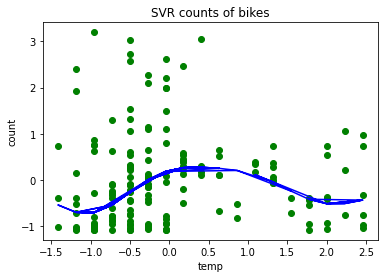

In [9]:
# Visualising the SVR results
plt.scatter(x,y,color="green")
plt.plot(x, regressor.predict(x), color = 'blue')
plt.xlabel('temp')
plt.ylabel('count')
plt.title("SVR counts of bikes")
plt.show()


In [10]:
#predict the value
regressor.predict(np.reshape(0.22,(1,1)))

array([0.27466438])

In [11]:
#Inverse transform
predict=sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[0.22]]))))
predict


array([55.93152194])